In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

Зададим параметр $\gamma$ из условия:

In [2]:
gamma = 0.95

Для построения точного доверительного интервала уровня доверия $\gamma$ для $\alpha$ при известном $\sigma^2$ за центральную статистику примем $\frac{\sum_{i=1}^n X_i - \alpha n}{\sigma \sqrt{n}} \sim N(0,1)$. Тогда $P(u_{\frac{1-\gamma}{2}} \le \frac{\sum_{i=1}^n X_i - \alpha n}{\sigma \sqrt{n}} \le u_{\frac{1+\gamma}{2}}) = \gamma$, где $u_{\frac{1-\gamma}{2}}, u_{\frac{1+\gamma}{2}}$ - квантили стандартного нормального распределения. Преобразуем данное выражение к следующему виду: $P(\frac{\sum_{i=1}^n X_i - \sigma \sqrt{n} u_{\frac{1+\gamma}{2}}}{n} \le \alpha \le \frac{\sum_{i=1}^n X_i - \sigma \sqrt{n} u_{\frac{1-\gamma}{2}}}{n}) = \gamma$. Теперь мы легко можем определить функцию, по которой мы будем строить точный доверительный интервал:

In [3]:
def a_sigma_known(sample, gamma, sigma):
    sum_of_sample = np.sum(sample)
    first_quantile = sps.norm.ppf((1. - gamma) / 2.)
    second_quantile = sps.norm.ppf((1. + gamma) / 2.)
    return ((sum_of_sample - sigma * np.sqrt(len(sample)) * second_quantile) / float(len(sample)) ,\
            (sum_of_sample - sigma * np.sqrt(len(sample)) * first_quantile) / float(len(sample)) )

Для построения интервала для $\sigma^2$  при известном $\alpha$ проделаем следующие операции. Сначала вычтем математическое ожидание $\alpha$, тогда мы получим нормальное распределение с нулевым матожиданием. Далее, чтобы получить стандартное нормальное, разделим на $\sqrt{D}$, то есть на корень из дисперсии. Получим сумму n квадратов стандартных нормальных распределений, которая распределена как $\chi^2$ с n степенями свободы:$\frac{1}{\sigma^2}\sum_{i=1}^n (X_i-\alpha)^2 \sim \chi_n^2$. Следовательно $P(\frac{1}{\sigma^2}\sum_{i=1}^n (X_i-\alpha)^2 \ge u_{1-\gamma}) = \gamma$, где $u_{1-\gamma}$-квантиль уровня $1-\gamma$ распределения хи-квадрат с n степенями свободы. Получаем точный доверительный интервал: $P(0 \le \sigma^2 \le \frac{\sum_{i=1}^n (X_i-\alpha)^2}{u_{1-\gamma}}) = \gamma$. Теперь определяем функцию, по которой будем строить точный доверительный интервал:

In [4]:
def sigma_a_known(sample, gamma, alpha):
    sum_of_sample = np.sum((sample - alpha) ** 2)
    quantile = sps.chi2.ppf((1. - gamma), len(sample))
    return (0,(sum_of_sample / (float(quantile))))

Для построения оставшихся интервалов воспользуемся материалами с лекции: $P(0 \le \sigma^2 \le \frac{nS^2}{u_{1-\gamma}}) = \gamma$, где $u_{1-\gamma}$ квантиль хи-квадрат распределения с n-1 степенями свободы; $P(\bar{X} - \sqrt{\frac{S^2}{n-1}}z_{\frac{1+\gamma}{2}} \le \alpha \le \bar{X} + \sqrt{\frac{S^2}{n-1}}z_{\frac{1+\gamma}{2}}) = \gamma$, где $z_{\frac{1+\gamma}{2}}$ - квантиль распределения Стьюдента с n-1 степенями свободы. Задаём функции, по которым будем строить интервалы:

In [5]:
def a_sigma_unknown(sample, gamma):
    sample_variance = (sample ** 2).mean() - sample.mean()
    quantile = sps.t.ppf((1. + gamma) / 2., len(sample) - 1)
    return ((sample.mean() - np.sqrt(sample_variance / float(len(sample) - 1)) *  quantile), \
             (sample.mean() + np.sqrt(sample_variance / float(len(sample) - 1)) *  quantile))

In [6]:
def sigma_a_unknown(sample, gamma):
    sample_variance = (sample ** 2).mean() - sample.mean()
    quantile = sps.chi2.ppf(1.-gamma, len(sample) - 1)
    return (0, len(sample) * sample_variance / float(quantile))

Теперь определяем функцию, которая будет выдавать нам интервалы:

In [7]:
def interval(gamma, interval_function, parameter = np.inf):
    sample = sps.norm.rvs(size=100)
    if parameter != np.inf:
        answer =  interval_function(sample, gamma, parameter)
    else:
        answer =  interval_function(sample, gamma)
    return answer

In [8]:
first = interval(gamma, a_sigma_known, 1)
first

(-0.15052955534356732, 0.24146324156444343)

In [9]:
second = interval(gamma, sigma_a_known, 0)
second

(0, 1.138333001504888)

In [10]:
third = interval(gamma, a_sigma_unknown)
third

(-0.0092268321120237973, 0.36584048759107801)

In [11]:
fourth = interval(gamma, sigma_a_unknown)
fourth

(0, 1.1993869991294301)

Теперь остаётся изобразить данные интервалы:

In [12]:
a = np.linspace(first[0], first[1], 1000)
b = np.linspace(second[0], second[1], 1000)
c = np.linspace(third[0], third[1], 1000)
d = np.linspace(fourth[0], fourth[1], 1000)

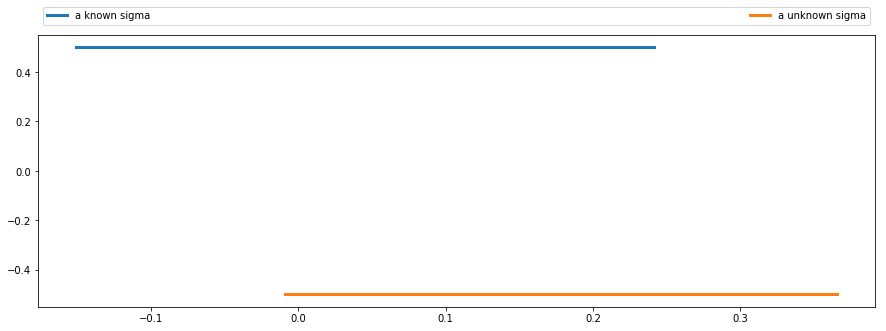

In [13]:
plt.figure(figsize=(15,5))
plt.plot(a, [0.5] * len(a), linewidth = 3, label = 'a known sigma')
plt.plot(c, [-0.5] * len(c), linewidth = 3, label = 'a unknown sigma')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand")
plt.show()

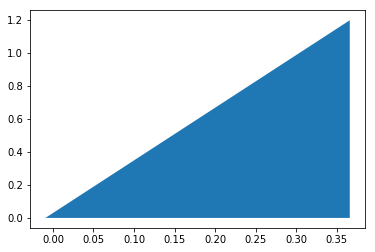

In [14]:
plt.fill_between(c,d)